In [1]:
import os
import pandas as pd
from openpyxl import load_workbook
import numpy as np
import matplotlib.pyplot as plt
%matplotlib qt
import pickle
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import copy
import matplotlib as mpl

In [2]:
pathName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualTrials\Scores\Subject_Block_Session_Trial_ScoreDifficultyNew.xlsx'
nasa_pathName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualSessions_TrialAvg\SubjectiveScores\Subject_Block_Session_Scores.xlsx'
corrFileName = r'C:\DTU\Data\201901_JanuaryExpt\DataExtracted\IndividualSessions_TrialAvg\Pupils\Subject_Block_Session_PupilSizeCorrelation2.xlsx'


df = pd.read_excel(open(pathName, 'rb'), sheet_name='Sheet1')
df_woNa = copy.deepcopy(df)

df2 = pd.read_excel(open(nasa_pathName, 'rb'), sheet_name='Sheet1')
df2_woNa = df2[df2.Frustration.notna()]

#df['TimeNotWriting'] = 

corr = pd.read_excel(open(corrFileName, 'rb'), sheet_name='Sheet1')
corr_short = corr[corr.Correlation>0.75]


In [4]:
DayNr = [day[0] for day in df.Day]

df['DayNr'] = DayNr

TypingTechnique = ['MS' if len(day)>1 else 'DT' for day in df.Day]

df['TypingTechnique'] = TypingTechnique

In [5]:
Day = [str(day) for day in df2.Day]
df2['Day'] = Day

DayNr = [day[0] for day in df2.Day]

df2['DayNr'] = DayNr

TypingTechnique = ['MS' if len(day)>1 else 'DT' for day in df2.Day]

df2['TypingTechnique'] = TypingTechnique


nasaTlx = df2.PhysicalDemand + df2.MentalDemand + df2.Performance + df2.Frustration + df2.TemporalDemand
df2['NasaTlx'] = nasaTlx

df3 = df2.merge(corr_short, on=['Subject','Day', 'Session'])


df3.to_csv(r'C:/DTU/Data/201901_JanuaryExpt/DataExtracted/IndividualSessions_TrialAvg/Subject_Block_Session_Scores_all.csv', sep=',',na_rep='', header=True, index=False)


In [6]:
DayNr = [str(day)[0] for day in df2_woNa.Day]

df2_woNa['DayNr'] = DayNr

TypingTechnique = ['MS' if len(str(day))>1 else 'DT' for day in df2_woNa.Day]

df2_woNa['TypingTechnique'] = TypingTechnique

nasaTlx = df2_woNa.PhysicalDemand + df2_woNa.MentalDemand + df2_woNa.Performance + df2_woNa.Frustration + df2_woNa.TemporalDemand
df2_woNa['NasaTlx'] = nasaTlx



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

In [7]:
#df1 = df.merge(corr_short, on=['Subject','Block', 'Session'])
df1 = copy.deepcopy(df) # for performance, correlation between R,L pupil size should not matter 

In [8]:
#df2_woNa.to_csv(r'C:/DTU/Data/201901_JanuaryExpt/DataExtracted/IndividualSessions_TrialAvg\Subject_Block_Session_Scores.csv', sep=',',na_rep='', header=True, index=False)


In [19]:
df2_woNa

,Subject,Day,DayDT,Language,TypingTechnique,Session,SessionDifficulty,MentalDemand,PhysicalDemand,TemporalDemand,Performance,Effort,Frustration,FatigueBeforeEye,FatigueBefore,FatigueAfter,FatigueDuring,FatigueDifference,DayNr,NasaTlx
2,ac,2,2,EN,DT,1,D,4.0,4.0,6.0,6.0,5.0,2.0,NaN,4.0,3.0,4.0,-1,2,22.0
3,ac,2,2,EN,DT,2,E,3.0,4.0,2.0,6.0,4.0,2.0,NaN,3.0,3.0,4.0,0,2,17.0
4,ac,3_MS,0,EN,MS,1,E,5.0,5.0,3.0,5.0,6.0,7.0,NaN,2.0,2.0,2.0,0,3,25.0
5,ac,3_MS,0,EN,MS,2,D,6.0,5.0,5.0,4.0,7.0,7.0,NaN,2.0,2.0,4.0,0,3,27.0
6,ac,4,3,EN,DT,1,D,3.0,3.0,4.0,6.0,5.0,1.0,NaN,3.0,3.0,3.0,0,4,17.0
7,ac,4,3,EN,DT,2,E,3.0,3.0,4.0,7.0,5.0,1.0,NaN,3.0,3.0,4.0,0,4,18.0
8,ac,5,4,EN,DT,1,E,3.0,3.0,4.0,6.0,4.0,1.0,NaN,4.0,4.0,4.0,0,5,17.0
9,ac,5,4,EN,DT,2,D,5.0,4.0,4.0,6.0,6.0,2.0,NaN,4.0,4.0,5.0,0,5,21.0
16,af,4,3,EN,DT,1,E,2.0,2.0,3.0,5.0,3.0,2.0,NaN,2.0,2.0,2.0,0,4,14.0
17,af,4,3,EN,DT,2,D,3.0,3.0,3.0,5.0,4.0,2.0,NaN,2.0,2.0,2.0,0,4,16.0


# Box plots of perceived difficulty for languages

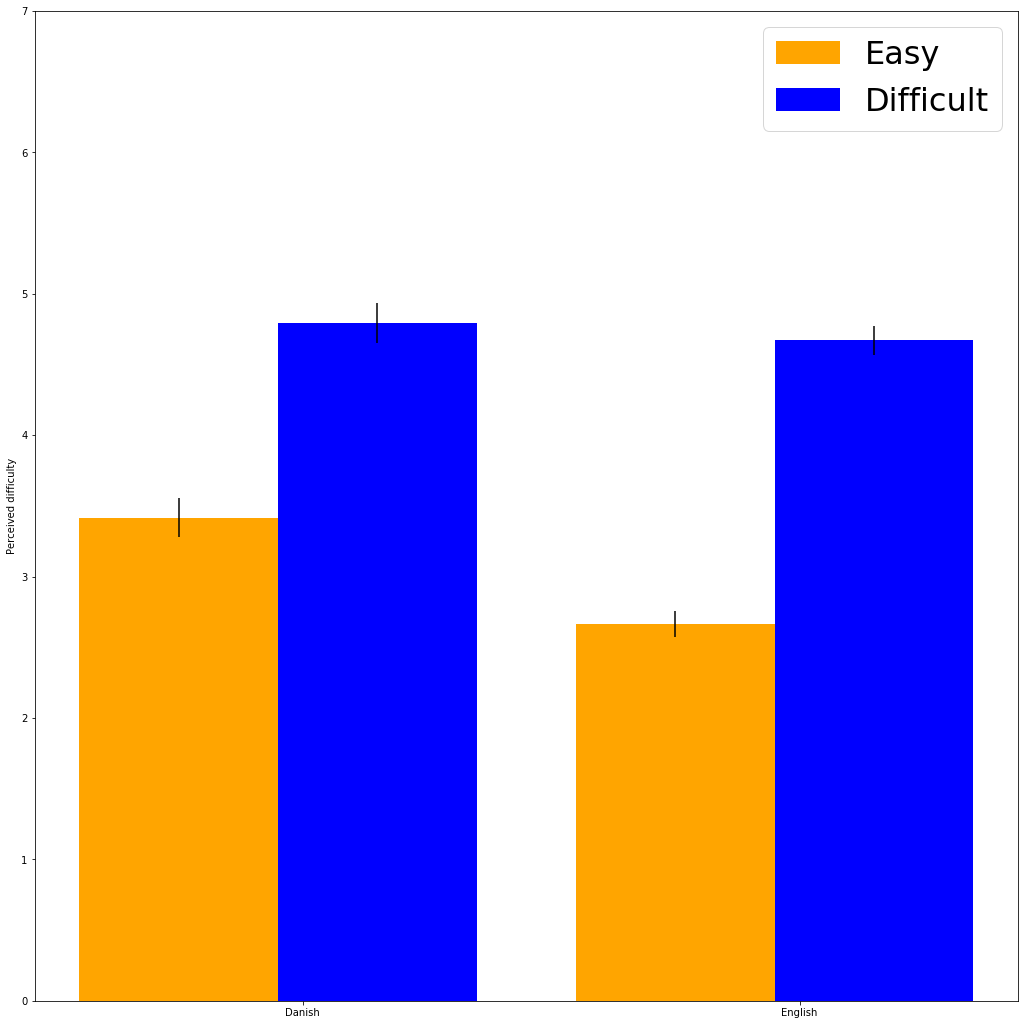

In [11]:
PlotTitle = 'ScoreDifficulty'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['ScoreDifficulty']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA')].mean())
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN')].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='DA'), df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='DA'), df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    p3 = ax1.bar(x_inds[ind+2], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='E', df1.Language=='EN'), df1.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    
    p4 = ax1.bar(x_inds[ind+3], df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].mean(), yerr = \
                 df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].std()/np.sqrt(df1[variable][np.logical_and(np.logical_and(df1.SessionDifficulty=='D', df1.Language=='EN'), df1.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['Danish', 'English'])
ax1.set_ylim([0, 7])
ax1.set_ylabel('Perceived difficulty')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\PerceivedDifficulty_Language.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Perceived difficulty over days

In [33]:
PlotTitle = 'ScoreDifficulty'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)



x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1, list2 = list(), list()
x_list1, x_list2 = list(), list()

variable = 'ScoreDifficulty'




for indDay, day in enumerate(np.unique(df1.DayDT)):
    if day==0:
        continue
    
    p1 = ax1.bar(x_inds[indDay-1], df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].mean(), yerr = \
                 df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].count()), \
                 color='orange', label='Easy', width = 0.5, error_kw=dict(lw=5, capsize=5, capthick=3))
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].mean(), \
                 yerr = df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].std()/ \
                 np.sqrt(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].count()), \
                 color='blue', label='Difficult', width = 0.5, error_kw=dict(lw=5, capsize=5, capthick=3))
    
    x_list1.append(x_inds[indDay-1])
    x_list2.append(x_inds[indDay-1]+0.5)
    list1.append(df1[variable][np.logical_and(df1.SessionDifficulty=='E', df1.DayDT==day)].mean())
    list2.append(df1[variable][np.logical_and(df1.SessionDifficulty=='D', df1.DayDT==day)].mean())
    

ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([1, 7])
ax1.set_ylabel('Score')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 52})
ax1.legend((p1, p2), ('Easy', 'Difficult'), frameon=False)


mpl.rcParams['axes.linewidth'] = 3
ax = plt.gca()
ax.tick_params(width=5, length = 7)



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\perceivedDifficulty_blocks_sessionDifficulty.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

# Results to report

In [26]:
variable = 'ScoreDifficulty'

# sDiff

print('sDiff')
print('E', np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')]))
print(np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='E')])))
print('D',np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')]))
print(np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.SessionDifficulty=='D')])))


# Day
print('Day')
day1_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)]))
day1_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==1)])))
day2_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)]))
day2_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==2)])))
day3_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)]))
day3_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==3)])))
day4_m = (np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)]))
day4_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.DayDT==4)])))

day_m = [day2_m-day1_m, day3_m-day2_m, day4_m-day3_m]
day_s = [np.sqrt(day1_s**2+day2_s**2), np.sqrt(day2_s**2 + day3_s**2), np.sqrt(day3_s**2+day4_s**2)]
print(day_m)
print(np.mean(day_m))
print(day_s)
print(np.mean(day_s))

# Session
print('Session')
print(np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==2)])-np.mean(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==1)]))
session2_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==2)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==2)])))
session1_s = (np.std(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==1)])/np.sqrt(len(df1[variable][np.logical_and(df1.TypingTechnique=='DT', df1.Session==1)])))
print(np.sqrt(session1_s**2+session2_s**2))


sDiff
E 2.96056338028169
0.07821864433379311
D 4.7175141242937855
0.08374434481798664
Day
[-0.394832041343669, -0.3596754057428213, -0.2604983993471848]
-0.3383352821445584
[0.18426324069988925, 0.182620113646068, 0.17972506299484295]
0.18220280578026674
Session
0.19786245205239616
0.13163552600673448


## Over session order

In [37]:
ScoreDifficulty_sessionA_mean = np.mean(df1.ScoreDifficulty[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')]) - np.mean(df1.ScoreDifficulty[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')])
ScoreDifficulty_sessionA_std = np.sqrt((np.std(df1.ScoreDifficulty[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')])/np.sqrt(len(df1.ScoreDifficulty[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')])))**2 + (np.std(df1.ScoreDifficulty[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')])/np.sqrt(len(df1.ScoreDifficulty[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')])))**2)


ScoreDifficulty_sessionB_mean = np.mean(df1.ScoreDifficulty[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')]) - np.mean(df1.ScoreDifficulty[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')])
ScoreDifficulty_sessionB_std = np.sqrt((np.std(df1.ScoreDifficulty[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')])/np.sqrt(len(df1.ScoreDifficulty[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')])))**2 + (np.std(df1.ScoreDifficulty[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')])/np.sqrt(len(df1.ScoreDifficulty[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')])))**2)



PlotTitle = 'Score Difficulty'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 42
others_fontSize = 32

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.Session==session)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'ScoreDifficulty'





p1 = ax1.bar(x_inds[0], ScoreDifficulty_sessionA_mean, yerr = ScoreDifficulty_sessionA_std, color='gray', error_kw=dict(lw=5, capsize=5, capthick=3))
    
p2 = ax1.bar(x_inds[1], ScoreDifficulty_sessionB_mean, yerr = ScoreDifficulty_sessionB_std, color='gray', error_kw=dict(lw=5, capsize=5, capthick=3))
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Block A', 'Block B'])
ax1.set_ylim([-2, 2.2])
ax1.set_ylabel('Score difference')
#ax1.set_xlabel('Sessions')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 52})


# annotate with mean values
#maxTime0 = 2.2
#ax1.text(x_inds[0], maxTime0, "mean = " + str(np.round(ScoreDifficulty_sessionA_mean, 3)), ha='center', va='bottom', fontsize = others_fontSize)
#maxTime1 = -2
#ax1.text(x_inds[1], maxTime1, "mean = " + str(np.round(ScoreDifficulty_sessionB_mean, 3)), ha='center', va='bottom', fontsize = others_fontSize)

mpl.rcParams['axes.linewidth'] = 3
ax = plt.gca()
ax.tick_params(width=5, length = 7)


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\ScoreDifficulty_sessions.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

# NASA-TLX

In [29]:
print(df2_woNa.NasaTlx.count(), df2.MentalDemand.count())

print(np.unique(df2_woNa.Subject))
for sub in np.unique(df2_woNa.Subject):
    print(sub)
    print(df2_woNa.DayDT[df2_woNa.Subject==sub])

102 178
['ac' 'af' 'aq' 'bh2' 'ch' 'jp' 'kj' 'le' 'ls1' 'ls2' 'mh' 'mn' 'ph' 'rh']
ac
2    2
3    2
4    0
5    0
6    3
7    3
8    4
9    4
Name: DayDT, dtype: int64
af
16    3
17    3
18    4
19    4
Name: DayDT, dtype: int64
aq
26    4
27    4
28    0
29    0
Name: DayDT, dtype: int64
bh2
40    1
41    1
42    2
43    2
44    3
45    3
46    4
47    4
48    0
49    0
Name: DayDT, dtype: int64
ch
52    2
53    2
54    3
55    3
56    4
57    4
58    0
59    0
Name: DayDT, dtype: int64
jp
72    0
73    0
74    2
75    2
76    3
77    3
78    4
79    4
Name: DayDT, dtype: int64
kj
80    1
81    1
82    0
83    0
84    2
85    2
86    3
87    3
88    4
89    4
Name: DayDT, dtype: int64
le
90    1
91    1
92    2
93    2
94    3
95    3
96    4
97    4
98    0
99    0
Name: DayDT, dtype: int64
ls1
102    2
103    2
104    3
105    3
106    0
107    0
108    4
109    4
Name: DayDT, dtype: int64
ls2
112    2
113    2
114    0
115    0
116    3
117    3
118    4
119    4
Name: DayDT, dtype

In [27]:
variable = 'NasaTlx'

# sDiff

print('sDiff')
print('E', np.mean(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.SessionDifficulty=='E')]))
print(np.std(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.SessionDifficulty=='E')])/np.sqrt(len(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.SessionDifficulty=='E')])))
print('D',np.mean(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.SessionDifficulty=='D')]))
print(np.std(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.SessionDifficulty=='D')])/np.sqrt(len(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.SessionDifficulty=='D')])))


# Day
print('Day')
day1_m = (np.mean(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.DayDT==1)]))
day1_s = (np.std(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.DayDT==1)])/np.sqrt(len(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.DayDT==1)])))
day2_m = (np.mean(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.DayDT==2)]))
day2_s = (np.std(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.DayDT==2)])/np.sqrt(len(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.DayDT==2)])))
day3_m = (np.mean(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.DayDT==3)]))
day3_s = (np.std(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.DayDT==3)])/np.sqrt(len(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.DayDT==3)])))
day4_m = (np.mean(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.DayDT==4)]))
day4_s = (np.std(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.DayDT==4)])/np.sqrt(len(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.DayDT==4)])))

day_m = [day2_m-day1_m, day3_m-day2_m, day4_m-day3_m]
day_s = [np.sqrt(day1_s**2+day2_s**2), np.sqrt(day2_s**2 + day3_s**2), np.sqrt(day3_s**2+day4_s**2)]
print(day_m)
print(np.mean(day_m))
print(day_s)
print(np.mean(day_s))

# Session
print('Session')
print(np.mean(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.Session==2)])-np.mean(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.Session==1)]))
session2_s = (np.std(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.Session==2)])/np.sqrt(len(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.Session==2)])))
session1_s = (np.std(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.Session==1)])/np.sqrt(len(df2_woNa[variable][np.logical_and(df2_woNa.TypingTechnique=='DT', df2_woNa.Session==1)])))
print(np.sqrt(session1_s**2+session2_s**2))


sDiff
E 16.9
0.7139677863881535
D 19.075
0.529607755796684
Day
[0.625, -2.1346153846153832, -0.9615384615384635]
-0.8237179487179489
[1.3722415512583779, 1.2870838479246525, 1.104079619868766]
1.254468339683932
Session
1.4750000000000014
0.9067369381468916


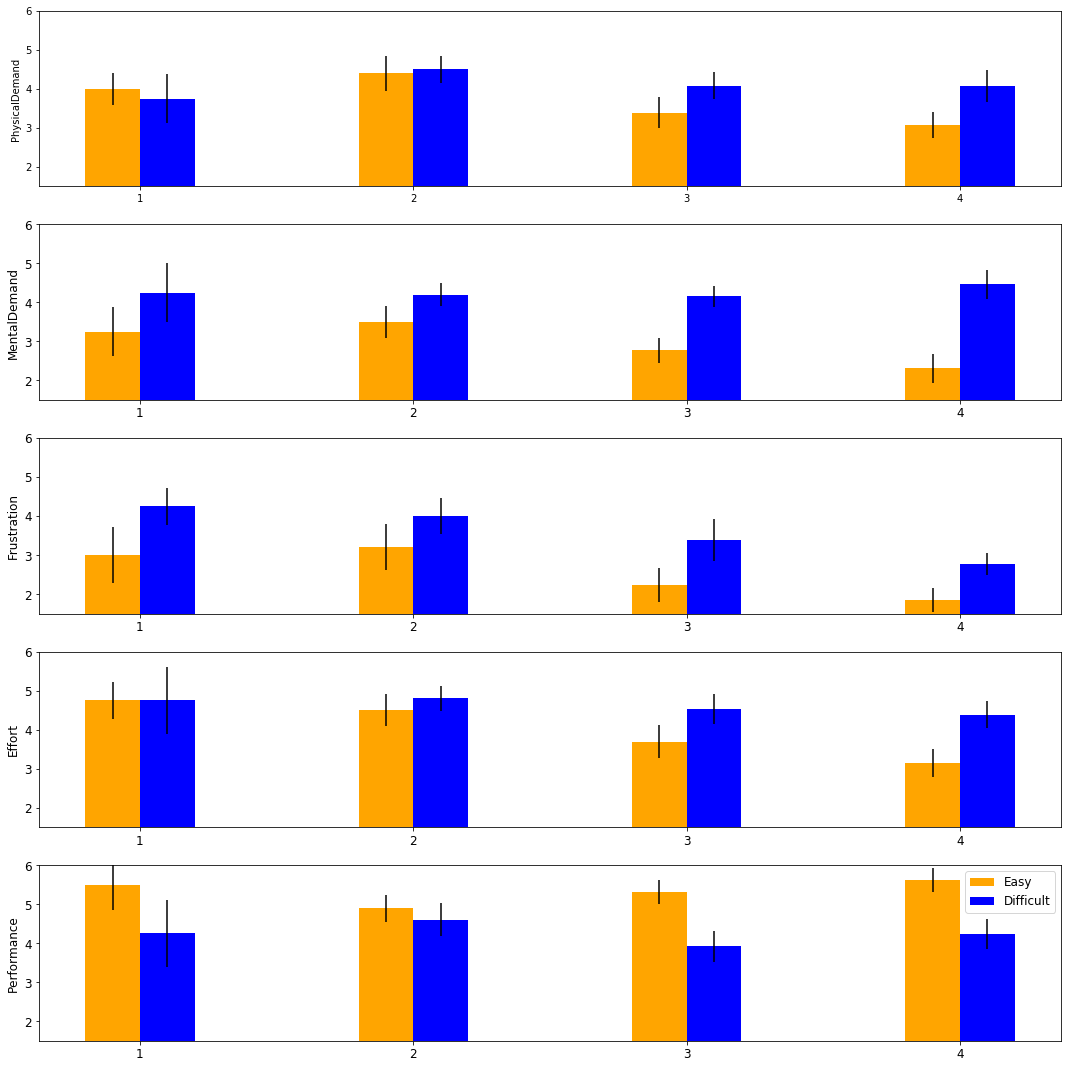

In [8]:
PlotTitle = 'MentalDemand'
fig = plt.figure(figsize=[15,15])


plot_variables = ['PhysicalDemand', 'MentalDemand', 'Frustration', 'Effort', 'Performance']


label_fontSize = 20
others_fontSize = 12

#boxplot = df2_woNa[np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()



for iPlot, variable in enumerate(plot_variables):
    
    ax1 = fig.add_subplot(len(plot_variables), 1, iPlot+1)
    for indDay, day in enumerate(np.unique(df2_woNa.DayDT)):
        if day==0:
            continue
        p1 = ax1.bar(x_inds[indDay-1], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
        p2 = ax1.bar(x_inds[indDay-1]+0.5, df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].mean(), \
                 yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
    ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
    ax1.set_xticklabels(['1', '2', '3', '4'])
    ax1.set_ylim([1.5, 6])
    ax1.set_ylabel(variable)
    #ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
    plt.rcParams.update({'font.size': 12})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


    # annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\SubjectiveScores_blocks_sessionDifficulty.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [97]:
PlotTitle = 'NasaTlx'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['NasaTlx']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA')].mean())
    list1.append(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN')].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    p3 = ax1.bar(x_inds[ind+2], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    
    p4 = ax1.bar(x_inds[ind+3], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['Danish', 'English'])
#ax1.set_ylim([0, 7])
ax1.set_ylabel('NASA-TLX score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\NasaTlx_Language.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Nasa-Tlx over days

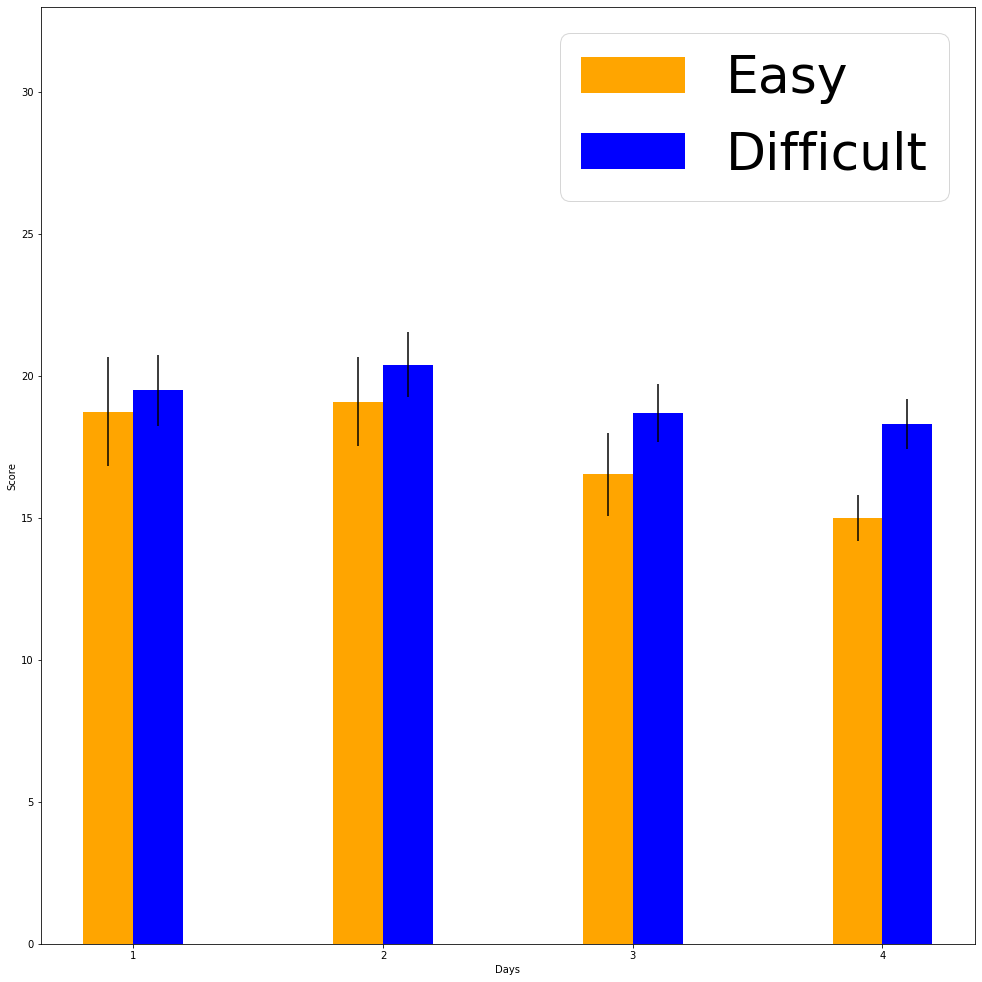

In [6]:
PlotTitle = 'NasaTlx'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df2_woNa[np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'NasaTlx'




for indDay, day in enumerate(np.unique(df2_woNa.DayDT)):
    if day==0:
        continue
    p1 = ax1.bar(x_inds[indDay-1], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].mean(), \
                 yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([0, 33])
ax1.set_ylabel('Score')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\NasaTlx_blocks_sessionDifficulty.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

# Sessions

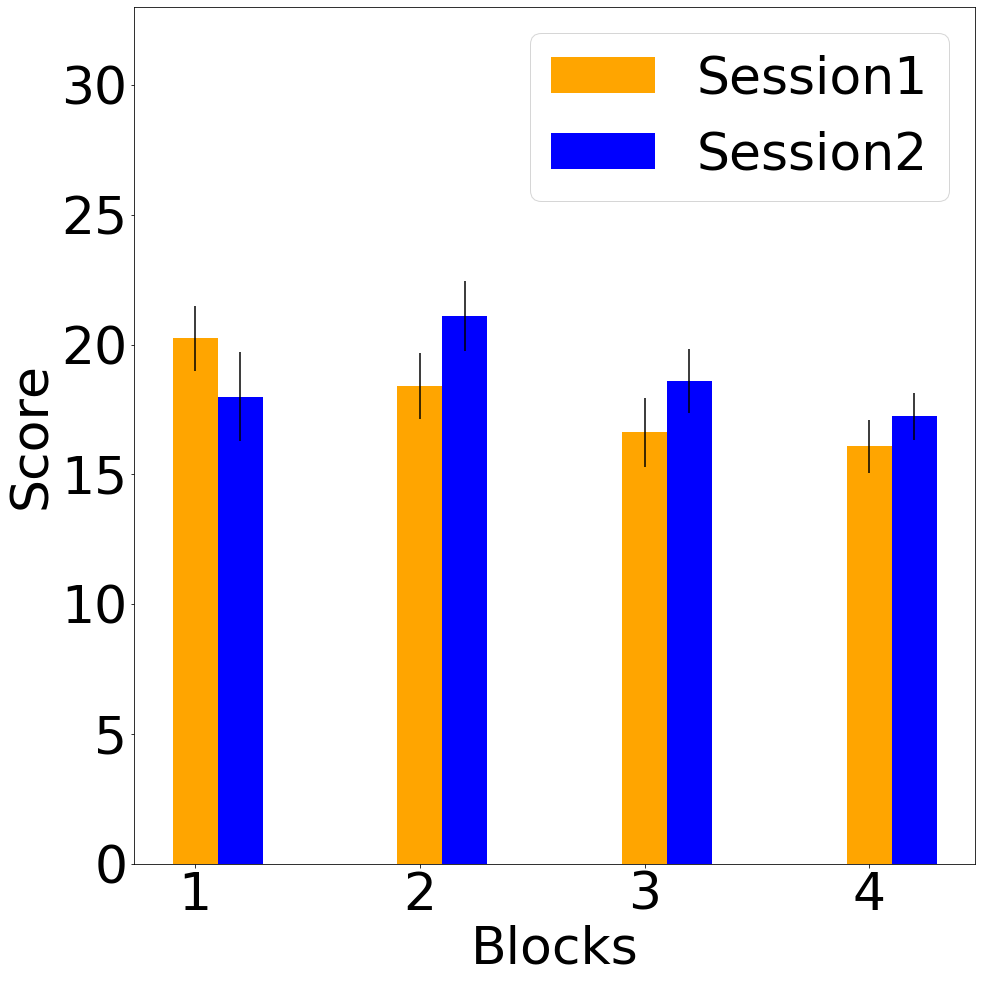

In [33]:
PlotTitle = 'NasaTlx'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df2_woNa[np.logical_and(df2_woNa.Session==1, df2_woNa.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'NasaTlx'




for indDay, day in enumerate(np.unique(df2_woNa.DayDT)):
    if day==0:
        continue
    p1 = ax1.bar(x_inds[indDay-1], df2_woNa[variable][np.logical_and(df2_woNa.Session==1, df2_woNa.DayDT==day)].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(df2_woNa.Session==1, df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.Session==1, df2_woNa.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df2_woNa[variable][np.logical_and(df2_woNa.Session==2, df2_woNa.DayDT==day)].mean(), \
                 yerr = df2_woNa[variable][np.logical_and(df2_woNa.Session==2, df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.Session==2, df2_woNa.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([0, 33])
ax1.set_ylabel('Score')
ax1.set_xlabel('Blocks')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Session1', 'Session2'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\NasaTlx_blocks_session.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Frustration

In [44]:
PlotTitle = 'Frustration'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df2_woNa[np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'Frustration'




for indDay, day in enumerate(np.unique(df2_woNa.DayDT)):
    if day==0:
        continue
    p1 = ax1.bar(x_inds[indDay-1], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].mean(), \
                 yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
ax1.set_xticklabels(['1', '2', '3', '4'])
#ax1.set_ylim([0, 33])
ax1.set_ylabel('Score')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\Frustration_blocks_sessionDifficulty.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

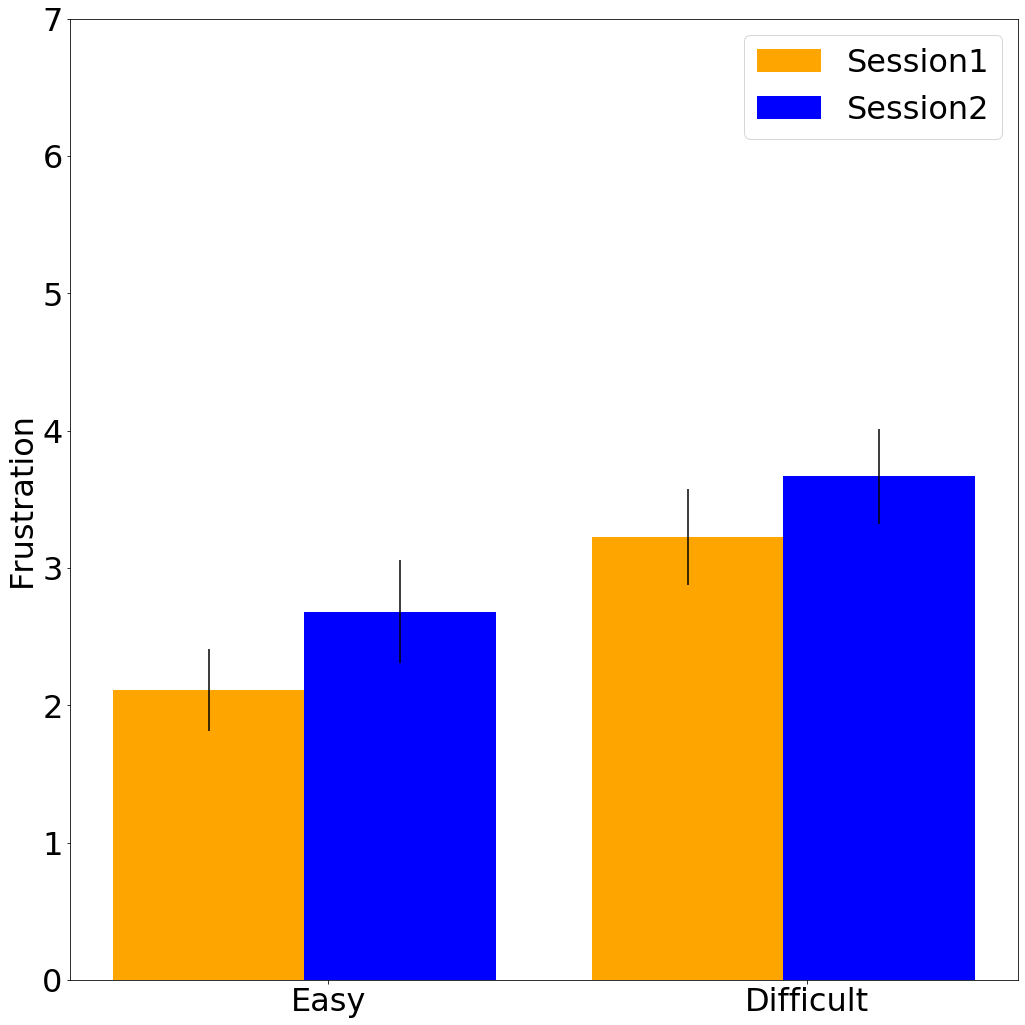

In [9]:

fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

variable = 'Frustration'


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

ind = 0

p1 = ax1.bar(x_inds[ind], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', \
            df2_woNa.Session==1), df2_woNa.TypingTechnique=='DT')].mean(), yerr = df2_woNa[variable][np.logical_and\
            (np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Session==1), df2_woNa.TypingTechnique=='DT')].std()\
        /np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Session==1), \
        df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    
p3 = ax1.bar(x_inds[ind+1], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', \
            df2_woNa.Session==2), df2_woNa.TypingTechnique=='DT')].mean(), yerr = df2_woNa[variable][np.logical_and\
            (np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Session==2), df2_woNa.TypingTechnique=='DT')].std()\
        /np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Session==2)\
            , df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Easy')

p2 = ax1.bar(x_inds[ind+2], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', \
    df2_woNa.Session==1), df2_woNa.TypingTechnique=='DT')].mean(), yerr = df2_woNa[variable][np.logical_and(np.logical_and\
    (df2_woNa.SessionDifficulty=='D', df2_woNa.Session==1), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa\
    [variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Session==1), \
    df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Difficult')


p4 = ax1.bar(x_inds[ind+3], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', \
    df2_woNa.Session==2), df2_woNa.TypingTechnique=='DT')].mean(), yerr = df2_woNa[variable][np.logical_and(np.logical_and\
    (df2_woNa.SessionDifficulty=='D', df2_woNa.Session==2), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[\
    variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Session==2), \
    df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylim([0, 7])
ax1.set_ylabel('Frustration')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
ax1.legend((p1, p3), ('Session1', 'Session2'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\Frustration_sessionOrder_difficulty.png', dpi = 300, bbox_to_anchor \
        = (0.95, 0.1))

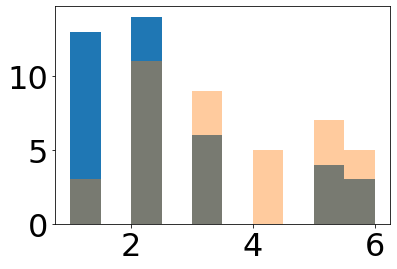

In [21]:
fig = plt.figure()
ax = fig.add_subplot()
p1 = ax.hist(df2_woNa.Frustration[np.logical_and(df2_woNa.SessionDifficulty == 'E', df2_woNa.TypingTechnique=='DT')])
p2 = ax.hist(df2_woNa.Frustration[np.logical_and(df2_woNa.SessionDifficulty == 'D', df2_woNa.TypingTechnique=='DT')], alpha = 0.4)
#ax.legend(['Easy', 'Difficult'])

Subject              22
Day                  22
DayDT                22
Language             22
TypingTechnique      22
Session              22
SessionDifficulty    22
MentalDemand         22
PhysicalDemand       22
TemporalDemand       22
Performance          22
Effort               22
Frustration          22
FatigueBeforeEye      1
FatigueBefore        21
FatigueAfter         22
FatigueDuring        22
FatigueDifference    22
DayNr                22
NasaTlx              22
dtype: int64

In [39]:
PlotTitle = 'Frustration'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['Frustration']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA')].mean())
    list1.append(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN')].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    p3 = ax1.bar(x_inds[ind+2], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    
    p4 = ax1.bar(x_inds[ind+3], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['Danish', 'English'])
ax1.set_ylim([0, 7])
ax1.set_ylabel('Frustration Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\Frustration_Language.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [17]:
PlotTitle = 'Frustration'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['Frustration']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 2]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    
    p1 = ax1.bar(x_inds[ind], df2_woNa[variable][df2_woNa.TypingTechnique=='DT'].mean(), yerr = \
                 df2_woNa[variable][df2_woNa.TypingTechnique=='DT'].std()/np.sqrt(df2_woNa[variable]\
                [df2_woNa.TypingTechnique=='DT'].count()), color='gray')
    
    p2 = ax1.bar(x_inds[ind+1], df2_woNa[variable][df2_woNa.TypingTechnique=='MS'].mean(), yerr = \
                 df2_woNa[variable][df2_woNa.TypingTechnique=='MS'].std()/np.sqrt(df2_woNa[variable]\
                [df2_woNa.TypingTechnique=='MS'].count()), color='gray')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Dwell-time', 'Multi-key'])
ax1.set_ylim([0, 7])
ax1.set_ylabel('Frustration Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\Frustration_TypingTechnique.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [42]:
PlotTitle = 'Frustration'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

variable = 'Frustration'



label_fontSize = 72
others_fontSize = 62

#boxplot = df2_woNa[df2_woNa.Session==1].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

ind = 0
    
p1 = ax1.bar(x_inds[ind], df2_woNa[variable][df2_woNa.Session==1].mean(), yerr = \
                 df2_woNa[variable][df2_woNa.Session==1].std()/np.sqrt(df2_woNa[variable][df2_woNa.Session==1].count()\
                                                                        ), color='gray', label='Easy')
    
p2 = ax1.bar(x_inds[ind+1], df2_woNa[variable][df2_woNa.Session==2].mean(), yerr = \
                 df2_woNa[variable][df2_woNa.Session==2].std()/np.sqrt(df2_woNa[variable][df2_woNa.Session==2].count()\
                                                                        ), color='gray', label='Difficult')
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
#ax1.set_title(PlotTitle)
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Session1', 'Session2'])
ax1.set_ylim([0, 7])
ax1.set_ylabel('Frustration Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Easy', 'Difficult'))

"""
# annotate with significance level
maxTime = 1.5
y_time, h, col = maxTime, 0.2, 'k'
ax1.plot([x_inds[0], x_inds[0], x_inds[1], x_inds[1]], [y_time, y_time+h, y_time+h, y_time], lw=2, c=col)
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax1.text((x_inds[0]+x_inds[1])*.5, y_time+h+0.02, "p<0.001", ha='center', va='bottom', color=col, fontsize = others_fontSize)


"""

plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\Frustration_sessionOrder.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [23]:
PlotTitle = 'FatigueDifference'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['FatigueDifference']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 2]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    
    p1 = ax1.bar(x_inds[ind], df2_woNa[variable][df2_woNa.TypingTechnique=='DT'].mean(), yerr = \
                 df2_woNa[variable][df2_woNa.TypingTechnique=='DT'].std()/np.sqrt(df2_woNa[variable]\
                [df2_woNa.TypingTechnique=='DT'].count()), color='gray')
    
    p2 = ax1.bar(x_inds[ind+1], df2_woNa[variable][df2_woNa.TypingTechnique=='MS'].mean(), yerr = \
                 df2_woNa[variable][df2_woNa.TypingTechnique=='MS'].std()/np.sqrt(df2_woNa[variable]\
                [df2_woNa.TypingTechnique=='MS'].count()), color='gray')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Dwell-time', 'Multi-key'])
ax1.set_ylim([0, 2])
ax1.set_ylabel('Fatigue Difference Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\FatigueDifference_TypingTechnique.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

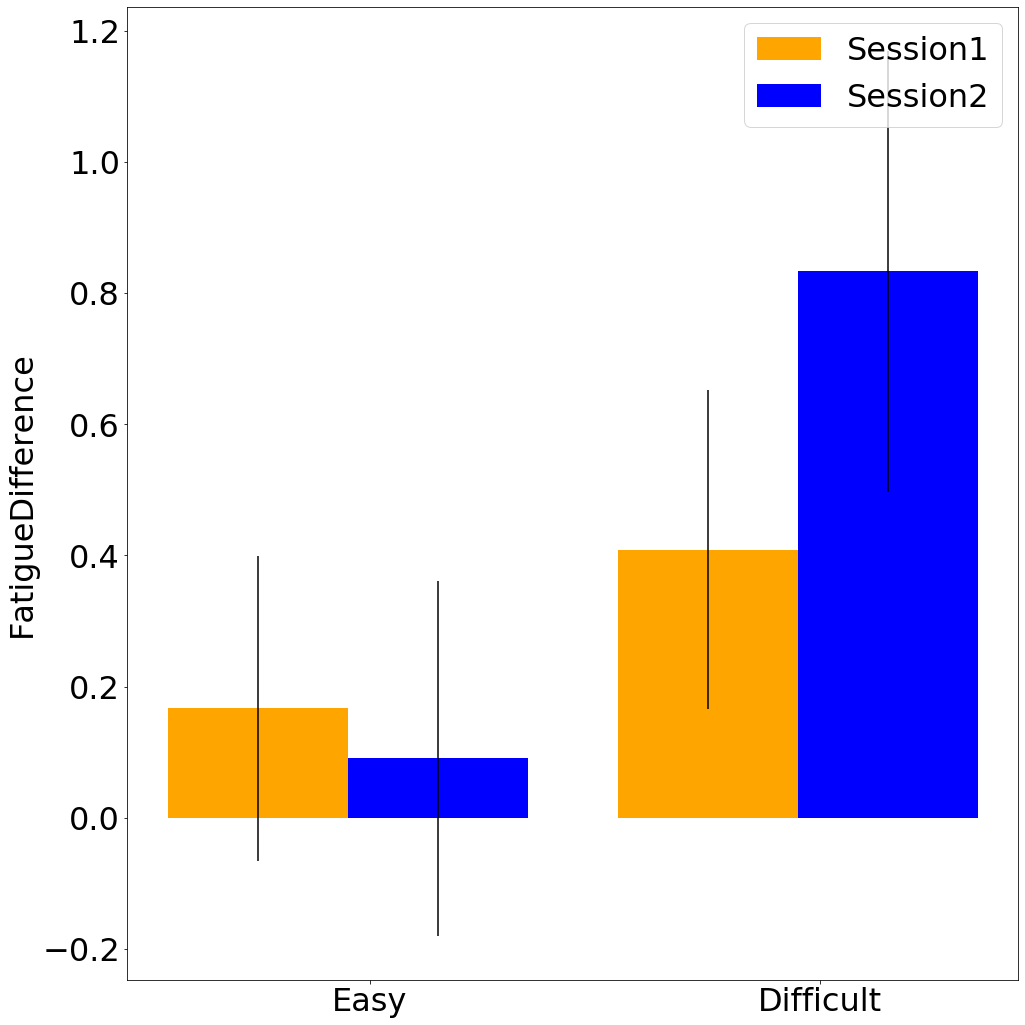

In [25]:

fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

variable = 'FatigueDifference'


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

ind = 0

p1 = ax1.bar(x_inds[ind], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', \
            df2_woNa.Session==1), df2_woNa.TypingTechnique=='DT')].mean(), yerr = df2_woNa[variable][np.logical_and\
            (np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Session==1), df2_woNa.TypingTechnique=='DT')].std()\
        /np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Session==1), \
        df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    
p3 = ax1.bar(x_inds[ind+1], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', \
            df2_woNa.Session==2), df2_woNa.TypingTechnique=='DT')].mean(), yerr = df2_woNa[variable][np.logical_and\
            (np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Session==2), df2_woNa.TypingTechnique=='DT')].std()\
        /np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Session==2)\
            , df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Easy')

p2 = ax1.bar(x_inds[ind+2], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', \
    df2_woNa.Session==1), df2_woNa.TypingTechnique=='DT')].mean(), yerr = df2_woNa[variable][np.logical_and(np.logical_and\
    (df2_woNa.SessionDifficulty=='D', df2_woNa.Session==1), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa\
    [variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Session==1), \
    df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Difficult')


p4 = ax1.bar(x_inds[ind+3], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', \
    df2_woNa.Session==2), df2_woNa.TypingTechnique=='DT')].mean(), yerr = df2_woNa[variable][np.logical_and(np.logical_and\
    (df2_woNa.SessionDifficulty=='D', df2_woNa.Session==2), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[\
    variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Session==2), \
    df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([0, 7])
ax1.set_ylabel('FatigueDifference')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
ax1.legend((p1, p3), ('Session1', 'Session2'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\FatigueDifference_sessionOrder_difficulty.png', dpi = 300, bbox_to_anchor\
        = (0.95, 0.1))

In [ ]:
typingSpeed_sessionA_mean = np.mean(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')]) - np.mean(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')])
typingSpeed_sessionA_std = np.sqrt((np.std(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')])/np.sqrt(len(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')])))**2 + (np.std(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')])/np.sqrt(len(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')])))**2)


typingSpeed_sessionB_mean = np.mean(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')]) - np.mean(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')])
typingSpeed_sessionB_std = np.sqrt((np.std(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')])/np.sqrt(len(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==2, df1.SessionDifficulty=='E'), df1.TypingTechnique=='DT')])))**2 + (np.std(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')])/np.sqrt(len(df1.CharactersPerTotalTime[np.logical_and(np.logical_and(df1.Session==1, df1.SessionDifficulty=='D'), df1.TypingTechnique=='DT')])))**2)

print(typingSpeed_sessionA_mean, typingSpeed_sessionA_std)
print(typingSpeed_sessionB_mean, typingSpeed_sessionB_std)

PlotTitle = 'Characters Per Total Time'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 42
others_fontSize = 32

#boxplot = df1[np.logical_and(df1.SessionDifficulty=='E', df1.Session==session)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

#x_inds = [1, 3.5, 6, 8.5]
x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'CharactersPerTotalTime'





p1 = ax1.bar(x_inds[0], typingSpeed_sessionA_mean, yerr = typingSpeed_sessionA_std, color='gray', \
            error_kw=dict(lw=5, capsize=5, capthick=3))
    
p2 = ax1.bar(x_inds[1], typingSpeed_sessionB_mean, yerr = typingSpeed_sessionB_std, color='gray',\
             error_kw=dict(lw=5, capsize=5, capthick=3))
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Block A', 'Block B'])
ax1.set_ylim([-0.5, 2.25])
ax1.set_ylabel('Typing speed difference [WPM]')
#ax1.set_xlabel('Sessions')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 52})


# annotate with mean values
#maxTime0 = 0.5
#ax1.text(x_inds[0], maxTime0, "mean = " + str(np.round(typingSpeed_sessionA_mean, 3)), ha='center', va='bottom', fontsize = others_fontSize)
#maxTime1 = 2.1
#ax1.text(x_inds[1], maxTime1, "mean = " + str(np.round(typingSpeed_sessionB_mean, 3)), ha='center', va='bottom', fontsize = others_fontSize)

mpl.rcParams['axes.linewidth'] = 3
ax = plt.gca()
ax.tick_params(width=5, length = 7)

plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\typingSpeed_sessions.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [54]:
PlotTitle = 'FatigueDifference'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df2_woNa[np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5, 11]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'FatigueDifference'




for indDay, day in enumerate(np.unique(df2_woNa.DayDT)):
    #print(day, ': ')
    #print(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)])
    #print(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)])
    
    p1 = ax1.bar(x_inds[indDay], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay]+0.5, df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].mean(), \
                 yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75, 11.25])
ax1.set_xticklabels(['0','1', '2', '3', '4'])
#ax1.set_ylim([0, 33])
ax1.set_ylabel('Score')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\FatigueDifference_blocks_sessionDifficulty.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

0 : 
4      0
29     1
48     1
58    -1
73     0
83     0
99     0
106    0
115    0
136   -1
164    4
Name: FatigueDifference, dtype: int64
5      0
28     1
49     0
59     0
72     0
82     4
98     0
107    1
114    3
137    1
165    2
Name: FatigueDifference, dtype: int64
1 : 
40     1
81     0
91     0
160    2
Name: FatigueDifference, dtype: int64
41     0
80     1
90     1
161   -2
Name: FatigueDifference, dtype: int64
2 : 
3      0
43     1
53    -1
74     0
85     0
92     0
102   -1
112    0
133    0
163    1
Name: FatigueDifference, dtype: int64
2     -1
42     3
52     0
75     0
84     0
93     2
103    0
113    0
132   -1
162    3
Name: FatigueDifference, dtype: int64
3 : 
7      0
16     0
44     2
54     0
77     1
86     0
95     1
105    1
116    1
126    1
135    0
157   -2
167    3
Name: FatigueDifference, dtype: int64
6      0
17     0
45     2
55     0
76     0
87     3
94    -1
104    0
117    2
127    0
134    1
156    0
166    0
Name: FatigueDifference, dtype

In [55]:
PlotTitle = 'FatigueDuring'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df2_woNa[np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5, 11]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'FatigueDuring'




for indDay, day in enumerate(np.unique(df2_woNa.DayDT)):
    #print(day, ': ')
    #print(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)])
    #print(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)])
    
    p1 = ax1.bar(x_inds[indDay], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay]+0.5, df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].mean(), \
                 yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75, 11.25])
ax1.set_xticklabels(['0','1', '2', '3', '4'])
#ax1.set_ylim([0, 33])
ax1.set_ylabel('Score')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\FatigueDuring_blocks_sessionDifficulty.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

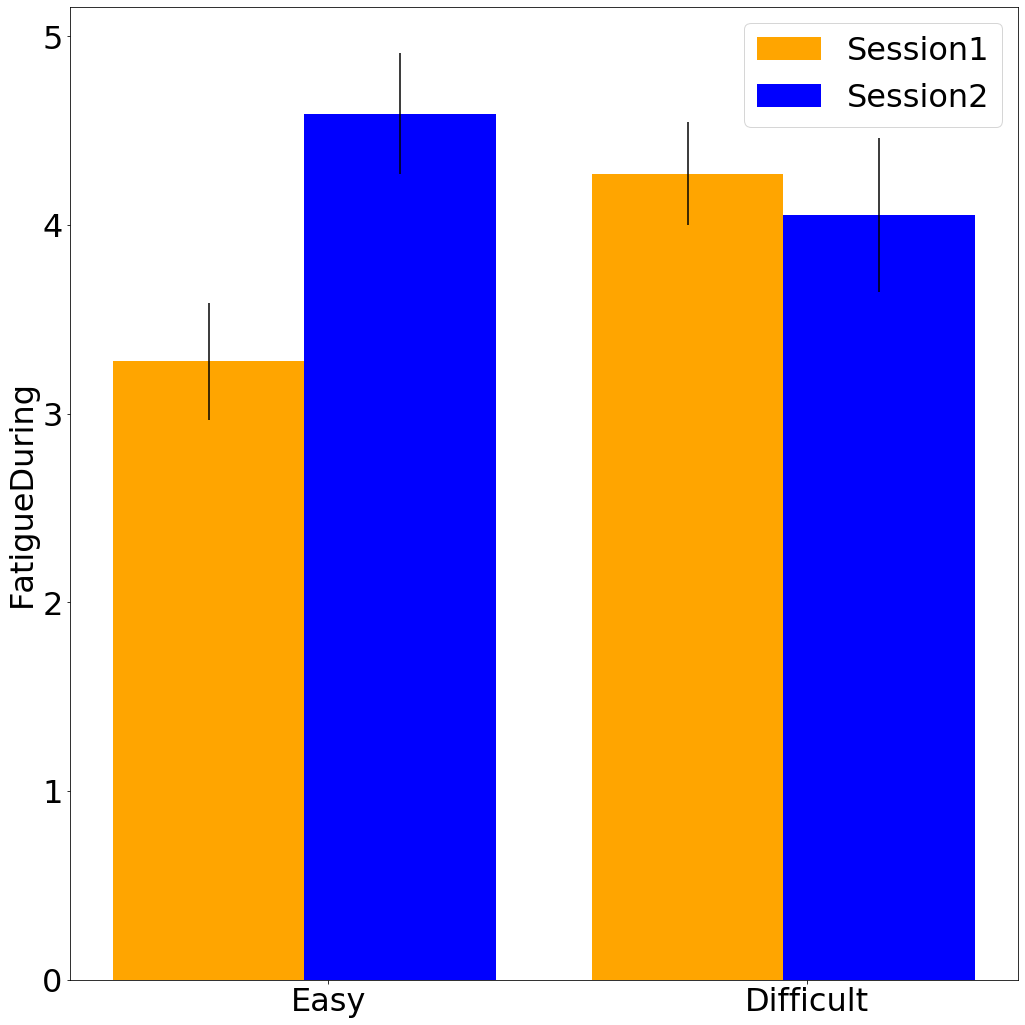

In [26]:

fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

variable = 'FatigueDuring'


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

ind = 0

p1 = ax1.bar(x_inds[ind], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', \
            df2_woNa.Session==1), df2_woNa.TypingTechnique=='DT')].mean(), yerr = df2_woNa[variable][np.logical_and\
            (np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Session==1), df2_woNa.TypingTechnique=='DT')].std()\
        /np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Session==1), \
        df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    
p3 = ax1.bar(x_inds[ind+1], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', \
            df2_woNa.Session==2), df2_woNa.TypingTechnique=='DT')].mean(), yerr = df2_woNa[variable][np.logical_and\
            (np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Session==2), df2_woNa.TypingTechnique=='DT')].std()\
        /np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Session==2)\
            , df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Easy')

p2 = ax1.bar(x_inds[ind+2], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', \
    df2_woNa.Session==1), df2_woNa.TypingTechnique=='DT')].mean(), yerr = df2_woNa[variable][np.logical_and(np.logical_and\
    (df2_woNa.SessionDifficulty=='D', df2_woNa.Session==1), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa\
    [variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Session==1), \
    df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Difficult')


p4 = ax1.bar(x_inds[ind+3], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', \
    df2_woNa.Session==2), df2_woNa.TypingTechnique=='DT')].mean(), yerr = df2_woNa[variable][np.logical_and(np.logical_and\
    (df2_woNa.SessionDifficulty=='D', df2_woNa.Session==2), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[\
    variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Session==2), \
    df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['Easy', 'Difficult'])
#ax1.set_ylim([0, 7])
ax1.set_ylabel('FatigueDuring')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': 32})
ax1.legend((p1, p3), ('Session1', 'Session2'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\FatigueDuring_sessionOrder_difficulty.png', dpi = 300, bbox_to_anchor\
        = (0.95, 0.1))

In [30]:
PlotTitle = 'FatigueAfter'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

variable = 'FatigueAfter'


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 2]


list1 = list()
x_list1 = list()


ind = 0    
    
p1 = ax1.bar(x_inds[ind], df2_woNa[variable][df2_woNa.TypingTechnique=='DT'].mean(), yerr = \
                 df2_woNa[variable][df2_woNa.TypingTechnique=='DT'].std()/np.sqrt(df2_woNa[variable]\
                [df2_woNa.TypingTechnique=='DT'].count()), color='gray')
    

p2 = ax1.bar(x_inds[ind+1], df2_woNa[variable][df2_woNa.TypingTechnique=='MS'].mean(), yerr = \
                 df2_woNa[variable][df2_woNa.TypingTechnique=='MS'].std()/np.sqrt(df2_woNa[variable]\
                [df2_woNa.TypingTechnique=='MS'].count()), color='gray')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Dwell-time', 'Multi-key'])
#ax1.set_ylim([0, 2])
ax1.set_ylabel('Fatigue')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\FatigueAfter_TypingTechnique.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [25]:
PlotTitle = 'FatigueDuring'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['FatigueDuring']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 2]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    
    p1 = ax1.bar(x_inds[ind], df2_woNa[variable][df2_woNa.TypingTechnique=='DT'].mean(), yerr = \
                 df2_woNa[variable][df2_woNa.TypingTechnique=='DT'].std()/np.sqrt(df2_woNa[variable]\
                [df2_woNa.TypingTechnique=='DT'].count()), color='gray')
    
    p2 = ax1.bar(x_inds[ind+1], df2_woNa[variable][df2_woNa.TypingTechnique=='MS'].mean(), yerr = \
                 df2_woNa[variable][df2_woNa.TypingTechnique=='MS'].std()/np.sqrt(df2_woNa[variable]\
                [df2_woNa.TypingTechnique=='MS'].count()), color='gray')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Dwell-time', 'Multi-key'])
ax1.set_ylim([0, 2])
ax1.set_ylabel('Fatigue')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\FatigueDuring_TypingTechnique.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Physical demand

In [33]:
PlotTitle = 'PhysicalDemand'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['PhysicalDemand']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 2]


list1 = list()
x_list1 = list()

ind = 0    
    
p1 = ax1.bar(x_inds[ind], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.TypingTechnique\
                =='DT')].mean(), yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', \
                df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(\
                df2_woNa.SessionDifficulty=='E', df2_woNa.TypingTechnique=='DT')].count()), color='gray')
    
p2 = ax1.bar(x_inds[ind+1], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.TypingTechnique\
                =='DT')].mean(), yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', \
                df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(\
                df2_woNa.SessionDifficulty=='D', df2_woNa.TypingTechnique=='DT')].count()), color='gray')
    
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['Easy', 'Difficult'])
ax1.set_ylim([0, 7])
ax1.set_ylabel('Physical Demand Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\PhysicalDemand.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [38]:
PlotTitle = 'PhysicalDemand'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

variable = 'PhysicalDemand'


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

ind = 0    
    
p1 = ax1.bar(x_inds[ind], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.TypingTechnique\
                =='DT')].mean(), yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', \
                df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(\
                df2_woNa.SessionDifficulty=='E', df2_woNa.TypingTechnique=='DT')].count()), color='orange')
    
p2 = ax1.bar(x_inds[ind+1], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.TypingTechnique\
                =='DT')].mean(), yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', \
                df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(\
                df2_woNa.SessionDifficulty=='D', df2_woNa.TypingTechnique=='DT')].count()), color='blue')

p3 = ax1.bar(x_inds[ind+2], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.TypingTechnique\
                =='MS')].mean(), yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', \
                df2_woNa.TypingTechnique=='MS')].std()/np.sqrt(df2_woNa[variable][np.logical_and(\
                df2_woNa.SessionDifficulty=='E', df2_woNa.TypingTechnique=='MS')].count()), color='orange')
    
p4 = ax1.bar(x_inds[ind+3], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.TypingTechnique\
                =='MS')].mean(), yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', \
                df2_woNa.TypingTechnique=='MS')].std()/np.sqrt(df2_woNa[variable][np.logical_and(\
                df2_woNa.SessionDifficulty=='D', df2_woNa.TypingTechnique=='MS')].count()), color='blue')
    

    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['DT', 'MS'])
ax1.set_ylim([0, 7])
ax1.set_ylabel('Physical Demand Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\PhysicalDemand_TypingTechnique.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [37]:
PlotTitle = 'PhysicalDemand'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

variable = 'PhysicalDemand'


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

ind = 0
p1 = ax1.bar(x_inds[ind], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
p2 = ax1.bar(x_inds[ind+1], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
p3 = ax1.bar(x_inds[ind+2], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    
p4 = ax1.bar(x_inds[ind+3], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['Danish', 'English'])
ax1.set_ylim([0, 7])
ax1.set_ylabel('Physical Demand Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\PhysicalDemand_Language.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Mental demand

In [100]:
PlotTitle = 'MentalDemand'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['MentalDemand']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA')].mean())
    list1.append(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN')].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    p3 = ax1.bar(x_inds[ind+2], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    
    p4 = ax1.bar(x_inds[ind+3], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['Danish', 'English'])
ax1.set_ylim([0, 7])
ax1.set_ylabel('Mental Demand Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\MentalDemand_Language.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

In [36]:
PlotTitle = 'MentalDemand'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

variable = 'MentalDemand'


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

ind = 0    
    
p1 = ax1.bar(x_inds[ind], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.TypingTechnique\
                =='DT')].mean(), yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', \
                df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(\
                df2_woNa.SessionDifficulty=='E', df2_woNa.TypingTechnique=='DT')].count()), color='orange')
    
p2 = ax1.bar(x_inds[ind+1], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.TypingTechnique\
                =='DT')].mean(), yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', \
                df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(\
                df2_woNa.SessionDifficulty=='D', df2_woNa.TypingTechnique=='DT')].count()), color='blue')

p3 = ax1.bar(x_inds[ind+2], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.TypingTechnique\
                =='MS')].mean(), yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', \
                df2_woNa.TypingTechnique=='MS')].std()/np.sqrt(df2_woNa[variable][np.logical_and(\
                df2_woNa.SessionDifficulty=='E', df2_woNa.TypingTechnique=='MS')].count()), color='orange')
    
p4 = ax1.bar(x_inds[ind+3], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.TypingTechnique\
                =='MS')].mean(), yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', \
                df2_woNa.TypingTechnique=='MS')].std()/np.sqrt(df2_woNa[variable][np.logical_and(\
                df2_woNa.SessionDifficulty=='D', df2_woNa.TypingTechnique=='MS')].count()), color='blue')
    
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['DT', 'MS'])
ax1.set_ylim([0, 7])
ax1.set_ylabel('Mental Demand Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})



plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\MentalDemand_TypingTechnique.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Mental demand over days

In [101]:
PlotTitle = 'MentalDemand'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df2_woNa[np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'MentalDemand'




for indDay, day in enumerate(np.unique(df2_woNa.DayDT)):
    if day==0:
        continue
    p1 = ax1.bar(x_inds[indDay-1], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].mean(), \
                 yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([0, 8])
ax1.set_ylabel('Score')
ax1.set_xlabel('Blocks')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\MentalDemand_blocks_sessionDifficulty.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Mental demand over days and session number

In [90]:
PlotTitle = 'MentalDemand'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df2_woNa[np.logical_and(df2_woNa.Session==1, df2_woNa.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'MentalDemand'




for indDay, day in enumerate(np.unique(df2_woNa.DayDT)):
    if day==0:
        continue
    p1 = ax1.bar(x_inds[indDay-1], df2_woNa[variable][np.logical_and(df2_woNa.Session==1, df2_woNa.DayDT==day)].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(df2_woNa.Session==1, df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.Session==1, df2_woNa.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df2_woNa[variable][np.logical_and(df2_woNa.Session==2, df2_woNa.DayDT==day)].mean(), \
                 yerr = df2_woNa[variable][np.logical_and(df2_woNa.Session==2, df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.Session==2, df2_woNa.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([0, 8])
ax1.set_ylabel('Score')
ax1.set_xlabel('Blocks')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Session1', 'Session2'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\MentalDemand_blocks_sessionNr.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Overall mental demand over days

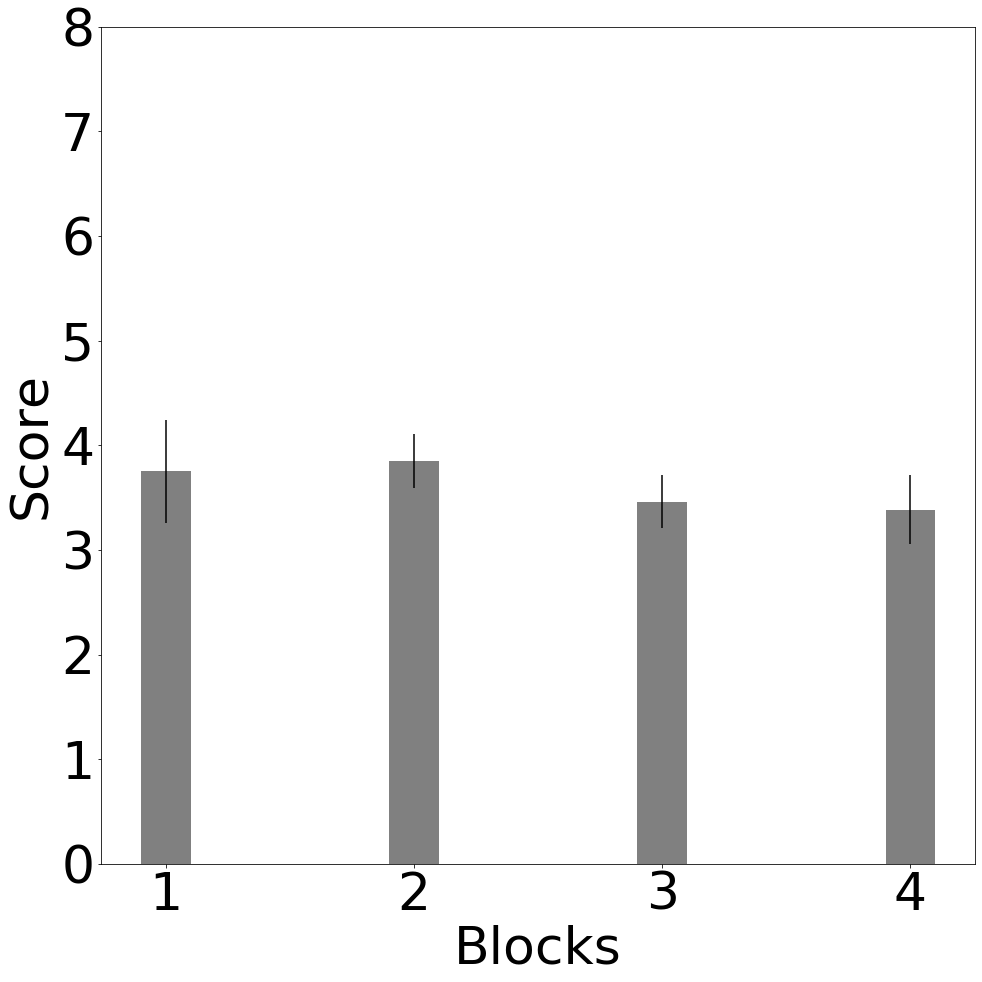

In [17]:
PlotTitle = 'MentalDemand'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df2_woNa[df2_woNa.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'MentalDemand'




for indDay, day in enumerate(np.unique(df2_woNa.DayDT)):
    if day==0:
        continue
    p1 = ax1.bar(x_inds[indDay-1], df2_woNa[variable][df2_woNa.DayDT==day].mean(), yerr = \
                 df2_woNa[variable][df2_woNa.DayDT==day].std()/ \
                 np.sqrt(df2_woNa[variable][df2_woNa.DayDT==day].count()), \
                 color='gray', label='Easy', width=0.5)
    
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([0, 8])
ax1.set_ylabel('Score')
ax1.set_xlabel('Blocks')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\MentalDemand_blocks.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

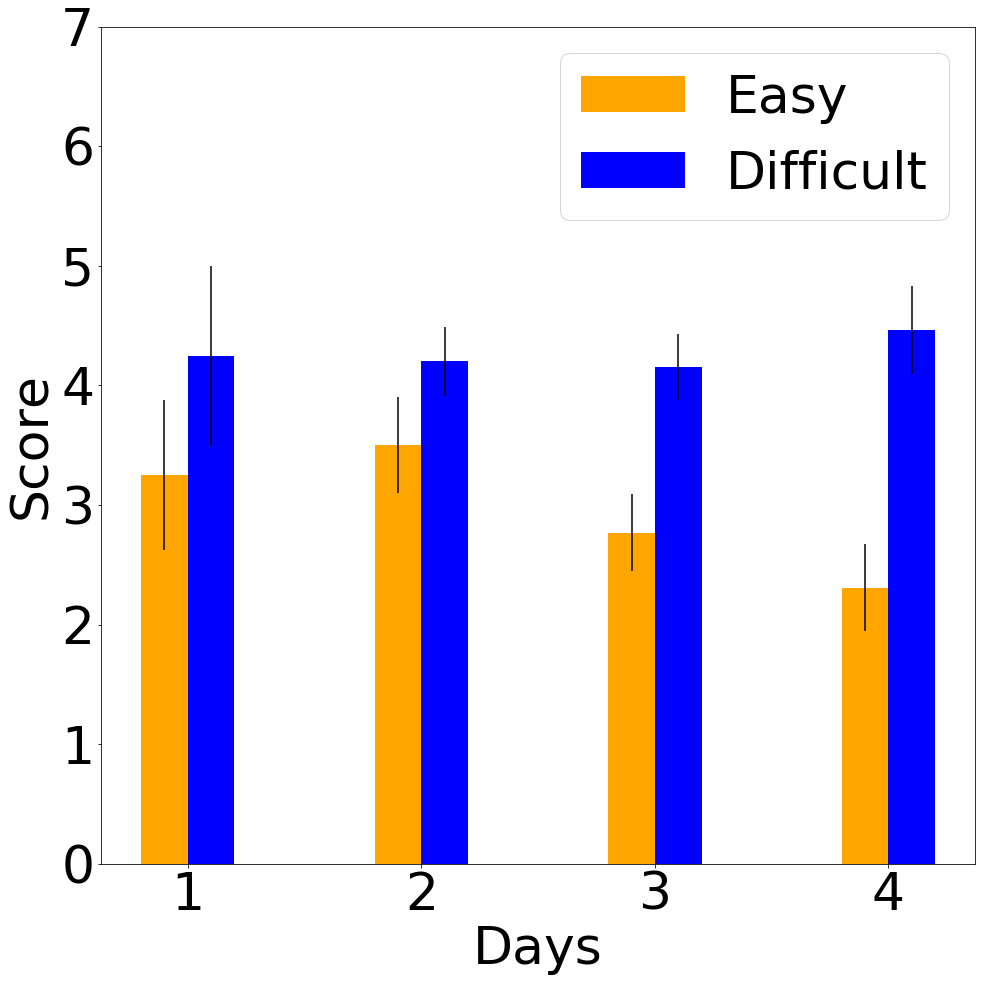

In [18]:
PlotTitle = 'MentalDemand'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df2_woNa[np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'MentalDemand'




for indDay, day in enumerate(np.unique(df2_woNa.DayDT)):
    if day==0:
        continue
    p1 = ax1.bar(x_inds[indDay-1], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].mean(), \
                 yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([0, 7])
ax1.set_ylabel('Score')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\MentalDemand_blocks_sessionDifficulty.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Temporal demand

In [103]:
PlotTitle = 'TemporalDemand'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['TemporalDemand']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA')].mean())
    list1.append(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN')].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    p3 = ax1.bar(x_inds[ind+2], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    
    p4 = ax1.bar(x_inds[ind+3], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['Danish', 'English'])
ax1.set_ylim([0, 7])
ax1.set_ylabel('Temporal Demand Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\TemporalDemand_Language.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Performance

In [104]:
PlotTitle = 'Performance'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['Performance']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA')].mean())
    list1.append(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN')].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    p3 = ax1.bar(x_inds[ind+2], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    
    p4 = ax1.bar(x_inds[ind+3], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['Danish', 'English'])
ax1.set_ylim([0, 7])
ax1.set_ylabel('Performance Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\Performance_Language.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Performance over days

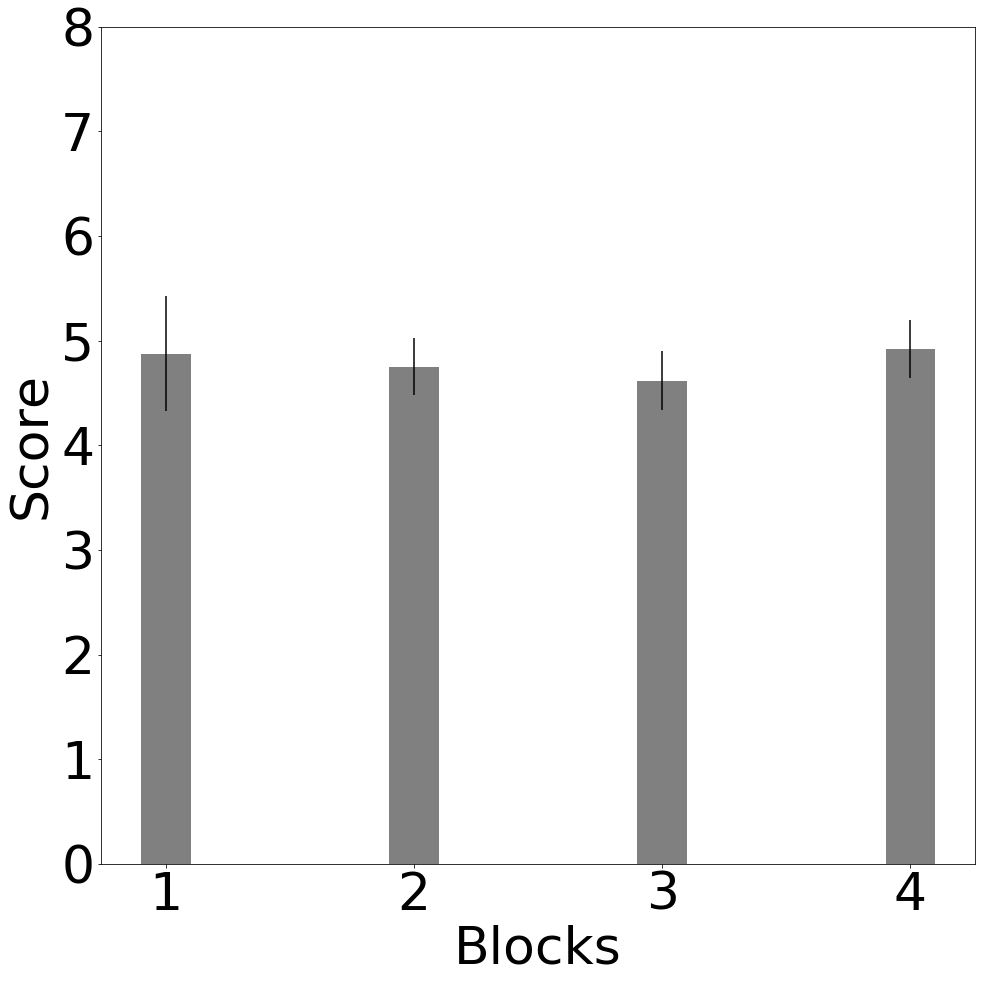

In [7]:
PlotTitle = 'Performance'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df2_woNa[df2_woNa.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'Performance'




for indDay, day in enumerate(np.unique(df2_woNa.DayDT)):
    if day==0:
        continue
    p1 = ax1.bar(x_inds[indDay-1], df2_woNa[variable][df2_woNa.DayDT==day].mean(), yerr = \
                 df2_woNa[variable][df2_woNa.DayDT==day].std()/ \
                 np.sqrt(df2_woNa[variable][df2_woNa.DayDT==day].count()), \
                 color='gray', label='Easy', width=0.5)
    
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([0, 8])
ax1.set_ylabel('Score')
ax1.set_xlabel('Blocks')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
#ax1.legend((p1, p2), ('Session1', 'Session2'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\Performance_blocks.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

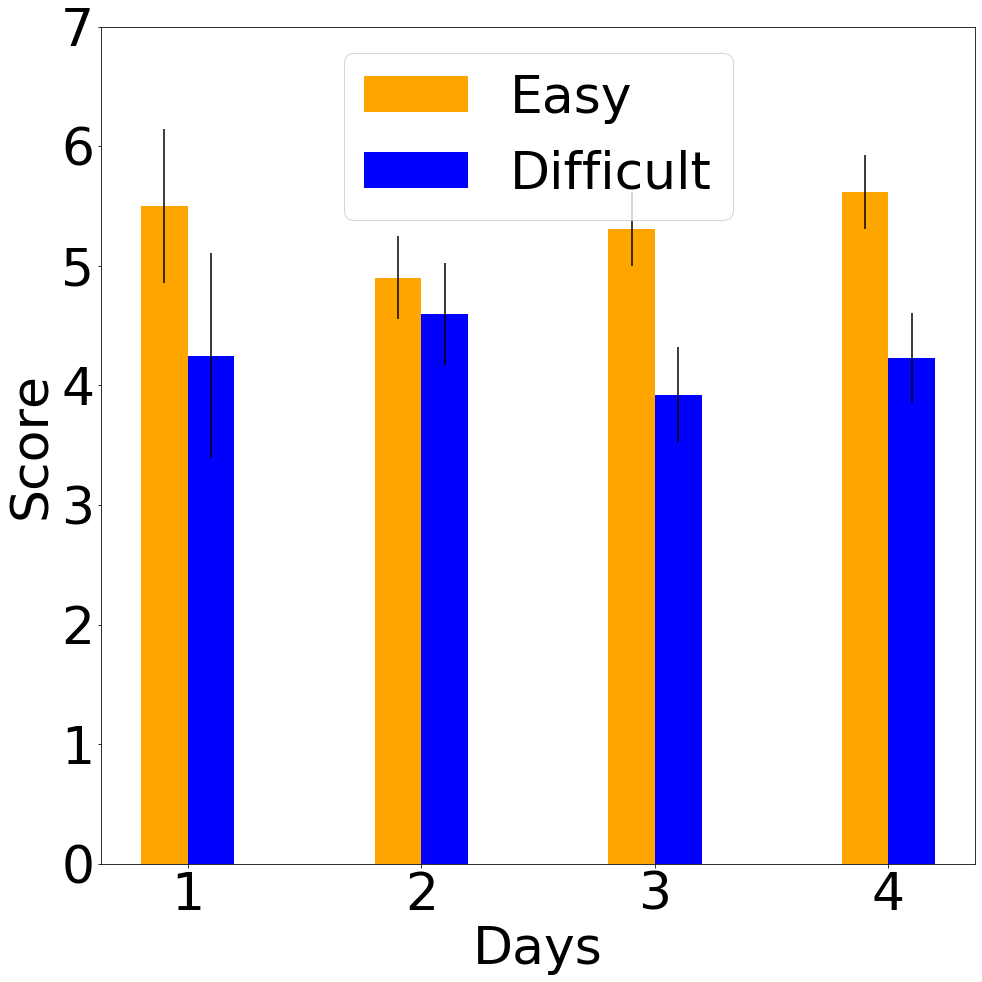

In [10]:
PlotTitle = 'Performance'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df2_woNa[np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'Performance'




for indDay, day in enumerate(np.unique(df2_woNa.DayDT)):
    if day==0:
        continue
    p1 = ax1.bar(x_inds[indDay-1], df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].mean(), \
                 yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75])
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([0, 7])
ax1.set_ylabel('Score')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\Performance_blocks_sessionDifficulty.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

11


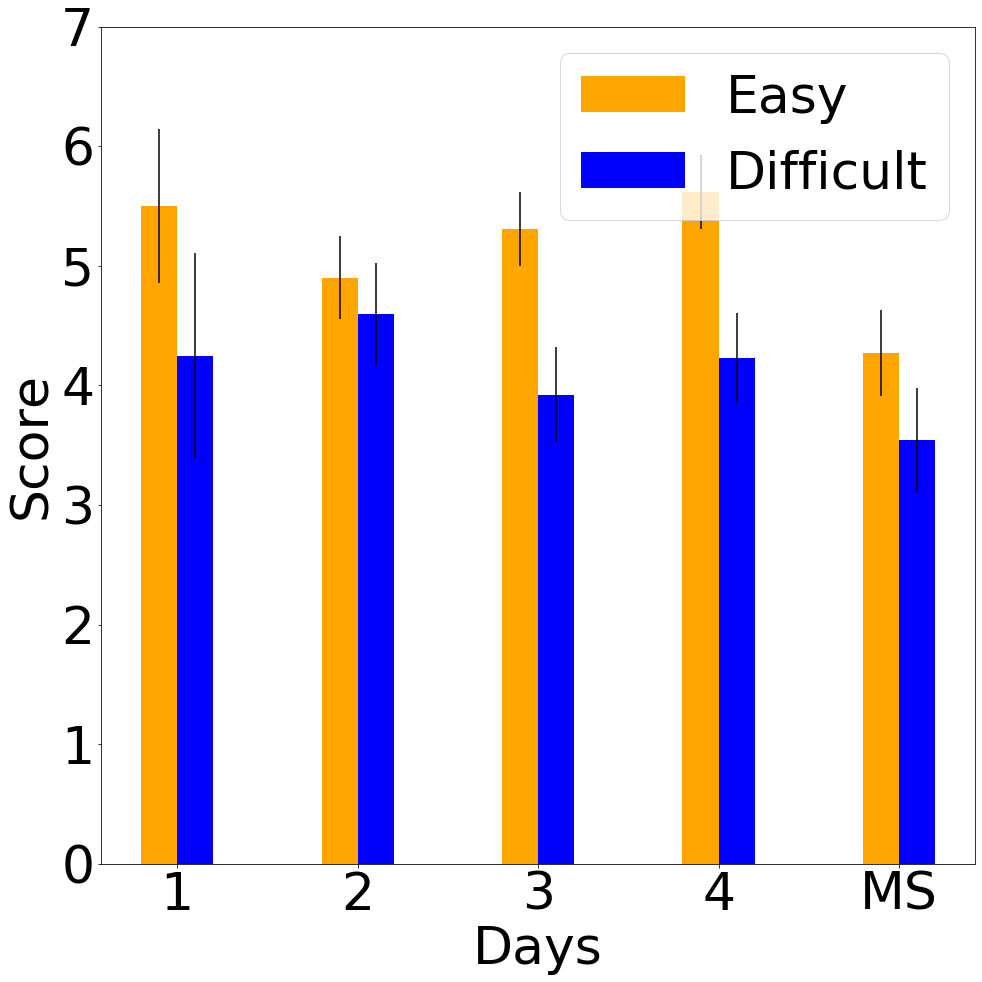

In [16]:
PlotTitle = 'Performance'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df2_woNa[np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5, 11]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'Performance'




for indDay, day in enumerate(np.unique(df2_woNa.DayDT)):
    xPoint_p1 = x_inds[indDay-1]
    xPoint_p2 = x_inds[indDay-1]+0.5
    if day==0:
        xPoint_p1 = x_inds[-1]
        xPoint_p2 = x_inds[-1]+0.5
        print(xPoint_p1)
        
    p1 = ax1.bar(xPoint_p1, df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(xPoint_p2, df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].mean(), \
                 yerr = df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks([1.25, 3.75, 6.25, 8.75, 11.25])
ax1.set_xticklabels(['1', '2', '3', '4', 'MS'])
ax1.set_ylim([0, 7])
ax1.set_ylabel('Score')
ax1.set_xlabel('Days')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\Fatigue\Performance_blocks_sessionDifficulty.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Performance over days and sessions

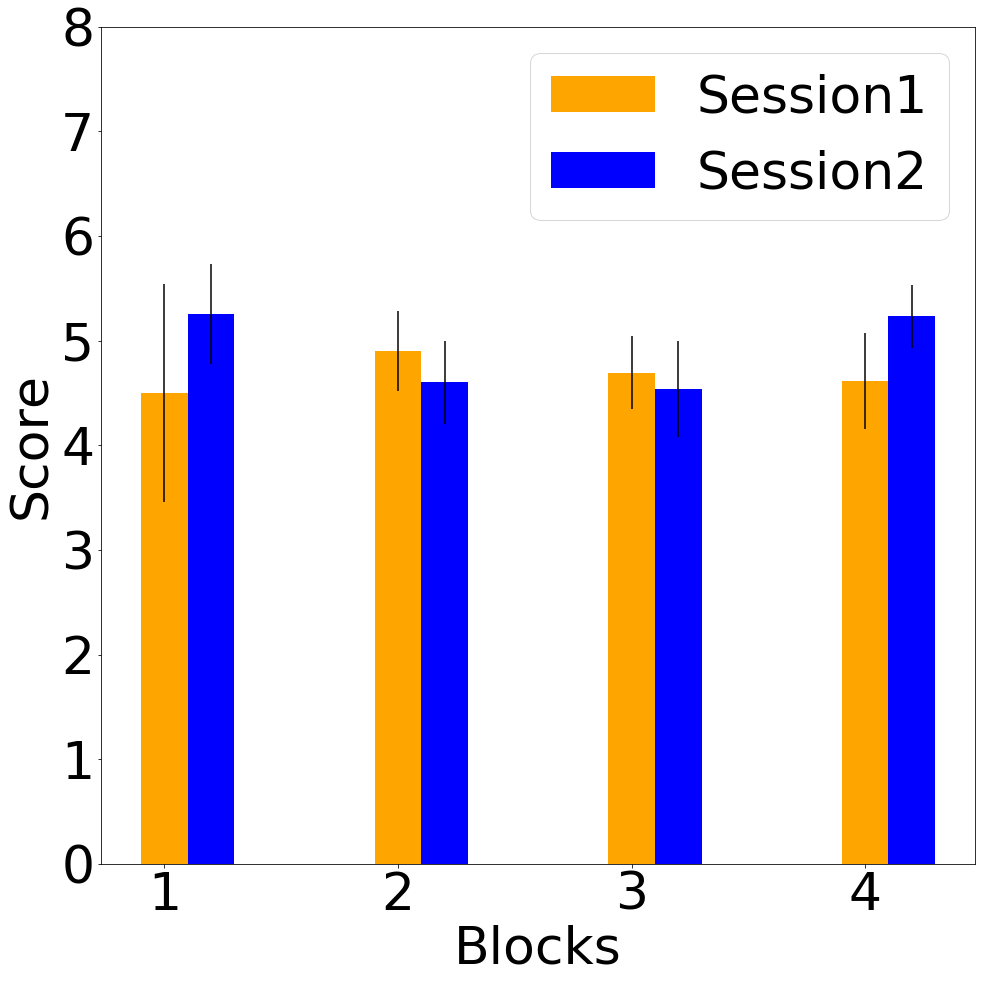

In [8]:
PlotTitle = 'Performance'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)




label_fontSize = 52
others_fontSize = 42

#boxplot = df2_woNa[np.logical_and(df2_woNa.Session==1, df2_woNa.DayDT==day)].boxplot(column=plot_variables, sym='', positions=None, widths=None, \
#        patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, showmeans=True, \
#        showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, \
#        meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None)

x_inds = [1, 3.5, 6, 8.5]
#x_inds = [1,2]

list1 = list()
x_list1 = list()

variable = 'Performance'




for indDay, day in enumerate(np.unique(df2_woNa.DayDT)):
    if day==0:
        continue
    p1 = ax1.bar(x_inds[indDay-1], df2_woNa[variable][np.logical_and(df2_woNa.Session==1, df2_woNa.DayDT==day)].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(df2_woNa.Session==1, df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.Session==1, df2_woNa.DayDT==day)].count()), \
                 color='orange', label='Easy', width=0.5)
    
    p2 = ax1.bar(x_inds[indDay-1]+0.5, df2_woNa[variable][np.logical_and(df2_woNa.Session==2, df2_woNa.DayDT==day)].mean(), \
                 yerr = df2_woNa[variable][np.logical_and(df2_woNa.Session==2, df2_woNa.DayDT==day)].std()/ \
                 np.sqrt(df2_woNa[variable][np.logical_and(df2_woNa.Session==2, df2_woNa.DayDT==day)].count()), \
                 color='blue', label='Difficult', width=0.5)
    
    
ax1.set_xticks(x_inds)
ax1.set_xticklabels(['1', '2', '3', '4'])
ax1.set_ylim([0, 8])
ax1.set_ylabel('Score')
ax1.set_xlabel('Blocks')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Session1', 'Session2'))


# annotate with significance level


plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\Performance_blocks_sessionNr.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))

## Effort

In [105]:
PlotTitle = 'Effort'
fig = plt.figure(figsize=[15,15])
ax1 = fig.add_subplot(1,1,1)

plot_variables = ['Effort']


label_fontSize = 18
others_fontSize = 12

x_inds = [1, 1.8, 3, 3.8]


list1 = list()
x_list1 = list()

for ind, variable in enumerate(plot_variables):
    
    list1.append(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA')].mean())
    list1.append(df2_woNa[variable][np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN')].mean())
    x_list1.append(x_inds[ind])
    x_list1.append(x_inds[ind+1])
    p1 = ax1.bar(x_inds[ind], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    p2 = ax1.bar(x_inds[ind+1], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='DA'), df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    p3 = ax1.bar(x_inds[ind+2], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='E', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].count()), color='orange', label='Easy')
    
    
    p4 = ax1.bar(x_inds[ind+3], df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].mean(), yerr = \
                 df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].std()/np.sqrt(df2_woNa[variable][np.logical_and(np.logical_and(df2_woNa.SessionDifficulty=='D', df2_woNa.Language=='EN'), df2_woNa.TypingTechnique=='DT')].count()), color='blue', label='Difficult')
    
    
    
#ax1.plot(x_list1, list1, '-.', color='k', markersize = 16)
    
ax1.set_xticks([1.5, 3.5])
ax1.set_xticklabels(['Danish', 'English'])
ax1.set_ylim([0, 7])
ax1.set_ylabel('Effort Score')
#ax1.set_xticklabels(['section1', 'section2', 'section3', 'section4'])
plt.rcParams.update({'font.size': label_fontSize})
ax1.legend((p1, p2), ('Easy', 'Difficult'))




plt.tight_layout()
fig.savefig(r'C:\DTU\Results\201901_Expt\ETRA\Effort_Language.png', dpi = 300, bbox_to_anchor = (0.95, 0.1))